# Matplotlib（オブジェクト指向）

[参考](https://qiita.com/nkay/items/d1eb91e33b9d6469ef51)

Matplotlibには「Matlab スタイル」と「オブジェクト指向型」の二つのスタイルが存在する。ここでは**オブジェクト指向型**について説明する。

オブジェクト指向型はMatplotlibの**グラフを作成するためのオブジェクト**を利用し、それに対して様々なメソッドを呼び出してグラフの要素を設定する方法である。細かな制御が必要な場合に適しているが、コード量が多くなる傾向がある。

適用できる場面

- グラフの要素を細かくカスタマイズしたい場合
- 複数のグラフを並べて表示したい場合

## グラフの種類

- 散布図
- バブルチャート
- 棒グラフ
- 積み上げ棒グラフ
- 折れ線グラフ
- 面グラフ
- ツリーマップ
- 100%積み上げグラフ
- 円グラフ
- ヒストグラム
- 箱ひげ図
- バイオリンプロット
- ヒートマップ

## グラフ作成の流れ

オブジェクト指向型インターフェースを用いてグラフを作成する場合、以下の二つのオブジェクトをまず作成する必要がある。

- Figureオブジェクト：グラフや軸を描くための土台となるオブジェクト
- Axesオブジェクト：Figureの子として作成され、グラフや軸などのグラフ要素を含んだオブジェクト

![matplotlib_object](../images/matplotlib_object/1716796224910.png)  

1. `plt.figure()`で`Figure`オブジェクトを作成
2. `Figure.add_subplot()`で`Axes`オブジェクトを作成
3. `Axes.plot()`などのメソッドによりグラフを作成
4. `Axes.set_title()`などのメソッドでグラフを装飾
5. `plt.show()`でグラフを表示

図の作成の1.と2.について簡単に説明する。

#### `plt.figure()`による`Figure`オブジェクトの作成

`plt.figure()`を実行すると無地の台紙である`Figure`が戻り値として返ってくる。この時、引数により台紙の設定が出来る。

|   引数    |                               説明                               |
| --------- | ---------------------------------------------------------------- |
| figsize   | `Figure`のサイズ。横×縦を`(float, float)`で指定する。            |
| dpi       | 画面に表示する時のdpi。整数                                      |
| facecolor | 図の背景色。Jupyterでは透過色がデフォルト                        |
| linewidth | 図の外枠の太さ。デフォルトは`0`（枠なし）                        |
| edgecolor | 図の外枠の色。                                                   |
| layout    | `constrained`や`tight`等を指定するとオブジェクトが自動調整される |

#### `Figure.add_subplot()`による`Axes`オブジェクトの作成

`Figure.add_subplot(nrows, ncols, index)`を実行すると無地のグラフである`Axes`が戻り値として返ってくる。

`nrows`、`ncols`、`index`は設置位置を決めるパラメータ。整数のみ。台紙`Figure`を縦に`nrows`分割、横に`ncols`分割し、`index`の位置に`Axes`が設置される。なにも入れないと`(1, 1, 1)`となる。

|    引数     |                                 説明                                 |
| ----------- | -------------------------------------------------------------------- |
| title       | グラフのタイトル                                                     |
| facecolor   | グラフの背景。略して`fc`でも可                                       |
| alpha       | グラフの透明度。0～1。                                               |
| zorder      | オブジェクトが重なっていた時、この値が大きいほうが前面に描画される。 |
| sharex      | 横軸を共有する`Axes`を指定                                           |
| xlabel      | 横軸名                                                               |
| xmargin     | データの最小値・最大値から横軸の最小値・最大値までのサイズ           |
| xticks      | 横軸の目盛り線を表示する値をリストで指定                             |
| xticklabels | 横軸のラベルをリストで指定                                           |

ただし、`xlabel`以降はAxes.set_〇〇メソッドでより詳細に指定できるため、そちらで行うことを推奨する。

#### ライブラリのインポート

In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.ticker import AutoMinorLocator
import japanize_matplotlib  # matplotlibの日本語対応に必要
import pandas as pd
import numpy as np

<a id="散布図"></a>

## 散布図（`Axes.scatter()`）

### 主な引数とその説明

|    引数    |                                 説明                                 |
| ---------- | -------------------------------------------------------------------- |
| label      | プロットのラベル。凡例に表示される。                                 |
| alpha      | 透明度。0～1で指定。                                                 |
| zorder     | オブジェクトが重なっていた場合この値が大きいほうが前面に描画される。 |
| marker     | マーカーの形状。`None`でマーカーなし。                               |
| s          | マーカーのサイズ。                                                   |
| c          | マーカーの色。`facecolor`、`facecolors`でも可。                      |
| linewidths | マーカーの縁の太さ。全て同じ場合は`linewidth`、`lw`でも可。          |
| edgecolors | マーカーの縁の色。                                                   |

In [13]:
# データの読み込み
scatter_df = pd.read_csv("../data/diabetes.csv")
scatter_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabetes
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


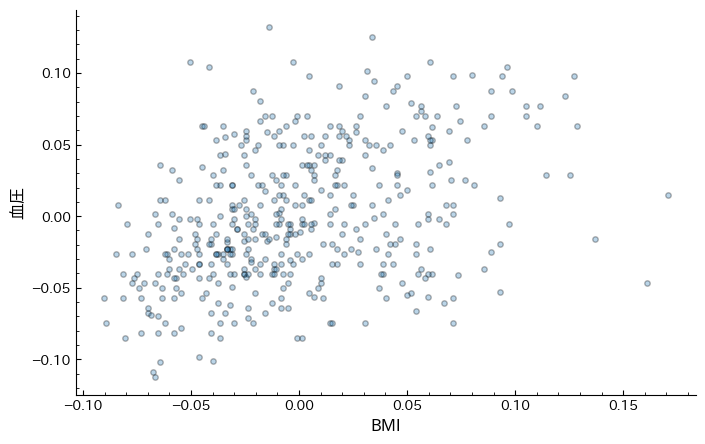

In [14]:
fig = plt.figure(figsize=(8, 5))  # 1. Figureオブジェクトの作成
ax = fig.add_subplot()            # 2. Axesオブジェクトの作成
ax.scatter(                       # 3. Axex.scatter()でグラフを作成
    x=scatter_df["bmi"],
    y=scatter_df["bp"],
    edgecolors="black",
    alpha=0.3,
    s=15
)
# 4. グラフの装飾
ax.set_xlabel("BMI", fontsize=12)
ax.set_ylabel("血圧", fontsize=12)
ax.minorticks_on()
ax.tick_params(direction="in", which="both")
ax.spines[["top", "right"]].set_visible(False)
# 5. グラフの表示
plt.show()

## バブルチャート（`Axes.scatter()`）

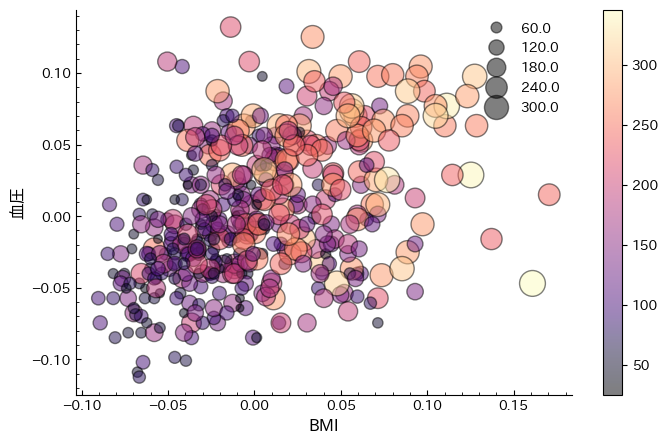

In [12]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot()
plot = ax.scatter(
    x=scatter_df["bmi"],
    y=scatter_df["bp"],
    s=scatter_df["diabetes"],  # 値によってマーカーサイズを変更
    c=scatter_df["diabetes"],         # 値によってマーカーの色を変更
    cmap="magma",          # カラーマップの種類
    edgecolors="black",
    alpha=0.5,             # 透明度
)
ax.set_xlabel("BMI", fontsize=12)
ax.set_ylabel("血圧", fontsize=12)
ax.minorticks_on()
ax.tick_params(direction="in", which="both")
ax.spines[["top", "right"]].set_visible(False)
ax.legend(*plot.legend_elements("sizes", num=6, fmt="{x}"), frameon=False)  # 凡例をサイズで分ける（6分割）
fig.colorbar(plot, ax=ax) # カラーバーを表示
plt.show()

## 棒グラフ（`Axes.bar()`）

### 主な引数とその説明

|   引数    |                                 説明                                 |
| --------- | -------------------------------------------------------------------- |
| label     | プロットのラベル。凡例に表示される。                                 |
| bottom    | 棒の下側。主に積み上げ棒グラフにするときに用いる。                   |
| align     | 棒の横位置。デフォルトは`center`                                     |
| color     | 折れ線の色。`c`でも可                                                |
| hatch     | 棒の網掛け                                                           |
| linewidth | 棒の縁の太さ。`lw`でも可。                                           |
| edgecolor | 棒の縁の色。`lc`でも可。                                             |
| alpha     | 透明度。0～1で指定。                                                 |
| zorder    | オブジェクトが重なっていた場合この値が大きいほうが前面に描画される。 |

In [5]:
bar_df = pd.read_csv(
    "../data/city_temperature.csv",
    sep="\t",              # タブ区切りのデータを取得
    index_col=None,
    parse_dates=["date"],  # 文字列から日付データに変換したい列名
    date_format="%Y%m%d"   # 日付データのフォーマット 例) 20111001 -> 2011-10-01
)

bar_df = bar_df.set_index("date")

ny_temp = bar_df["New York"].resample("ME").mean()
ny_temp_std = bar_df["New York"].resample("ME").std()
sf_temp = bar_df["San Francisco"].resample("ME").mean()
sf_temp_std = bar_df["San Francisco"].resample("ME").std()
austin_temp = bar_df["Austin"].resample("ME").mean()
austin_temp_std = bar_df["Austin"].resample("ME").std()

bar_df = pd.DataFrame(
    data={
        "New York": ny_temp,
        "New York(std)": ny_temp_std,
        "San Francisco": sf_temp,
        "San Francisco(std)": sf_temp_std,
        "Austin": austin_temp,
        "Austin(std)": austin_temp_std
    }
)
month = bar_df.index.month

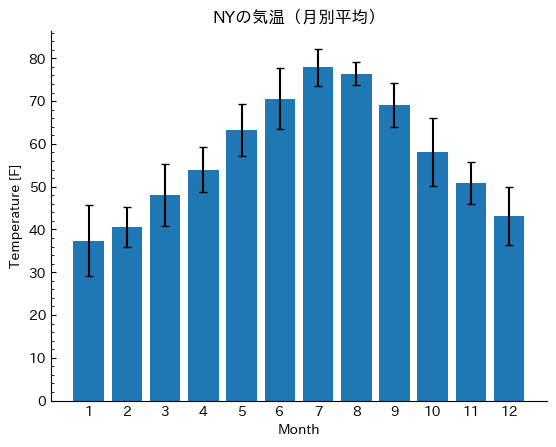

In [6]:
fig = plt.figure()
ax = fig.add_subplot()

ax.bar(
    x=month,
    height=ny_temp,
    yerr=ny_temp_std,
    capsize=3
)

ax.set_xticks(month)
ax.set_title("NYの気温（月別平均）")
ax.set_xlabel("Month")
ax.set_ylabel("Temperature [F]")
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(direction="in", which="both", bottom=False)
ax.spines[["top", "right"]].set_visible(False)
plt.show()

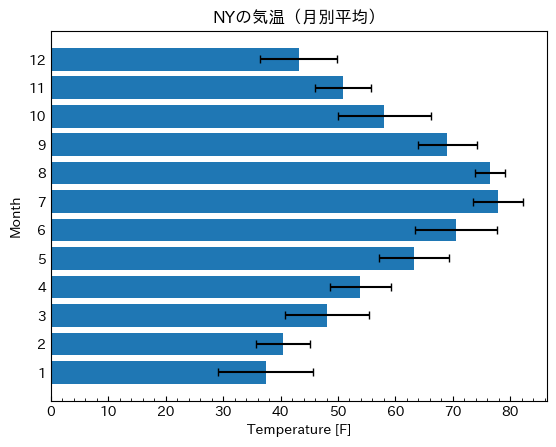

In [7]:
fig = plt.figure()
ax = fig.add_subplot()

ax.barh(
    y=month,
    width=ny_temp,
    xerr=ny_temp_std,
    capsize=3
)

ax.set_yticks(month)
ax.set_title("NYの気温（月別平均）")
ax.set_xlabel("Temperature [F]")
ax.set_ylabel("Month")
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(direction="in", which="both", left=False)
plt.show()

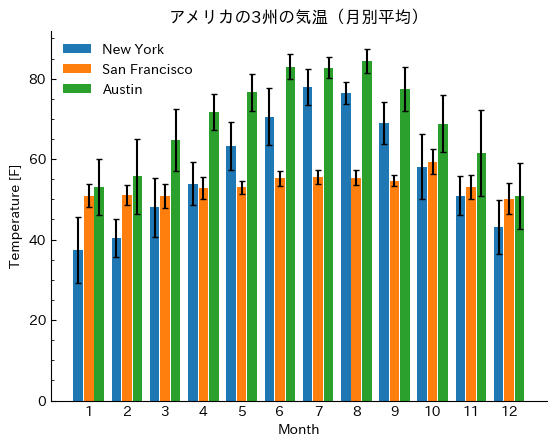

In [8]:
width = 0.25
gap = width / 10
shift = width + gap

fig = plt.figure()
ax = fig.add_subplot()

for temp_mean, temp_std, label, shift in zip(
    [ny_temp, sf_temp, austin_temp],
    [ny_temp_std, sf_temp_std, austin_temp_std],
    ["New York", "San Francisco", "Austin"],
    [-shift, 0, shift]
):
    ax.bar(
        x=month + shift,
        height=temp_mean,
        label=label,
        width=width,
        yerr=temp_std,
        capsize=2
    )

ax.set_xticks(month)
ax.set_title("アメリカの3州の気温（月別平均）")
ax.set_xlabel("Month")
ax.set_ylabel("Temperature [F]")
# ax.legend(loc="upper left", bbox_to_anchor=(1, 1))
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(direction="in", which="both", bottom=False)
ax.spines[["top", "right"]].set_visible(False)
ax.legend(frameon=False)
plt.show()

## 積み重ね棒グラフ(`Axes.bar()`)

In [9]:
stacked_bar_df = pd.read_csv("../data/japan_energy.csv", index_col=0)
stacked_bar_df.head()

,石油,石炭,天然ガス,原子力,水力,新エネルギー・地熱等
年度,,,,,,
1965,3.56,1.87,0.08,0.00,0.75,0.11
1966,4.13,1.92,0.09,0.01,0.77,0.11
1967,5.11,2.29,0.09,0.01,0.67,0.11
1968,5.95,2.42,0.10,0.01,0.72,0.12
1969,7.19,2.59,0.12,0.01,0.73,0.13


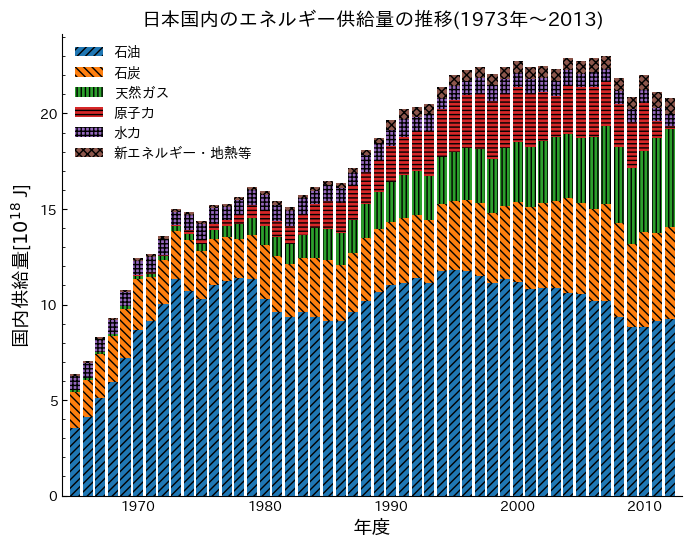

In [10]:
# hatchの細かさは"/"などの数を増やすことで細かくすることができる。ここでは全て4番目の細かさ
hatch_patterns = [ "////" , "\\\\\\\\" , "||||" , "----" , "++++" , "xxxx", "oooo", "OOOO", "....", "****" ]
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()
bottom = np.zeros(stacked_bar_df.index.shape)

for i, enegy_type in enumerate(stacked_bar_df.columns):
    ax.bar(
        x=stacked_bar_df.index,
        height=stacked_bar_df[enegy_type],
        bottom=bottom,
        label=enegy_type,
        hatch=hatch_patterns[i],
        )
    bottom += stacked_bar_df[enegy_type]

ax.set_xlabel("年度", fontsize=14)
ax.set_ylabel("国内供給量[$10^{18}$ J]", fontsize=14)
ax.set_xlim([1964, 2013])
ax.set_title("日本国内のエネルギー供給量の推移(1973年～2013)", fontsize=14)
ax.legend(frameon=False)
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(direction="in", which="both", bottom=False)
ax.spines[["top", "right"]].set_visible(False)
plt.show()

## 折れ線グラフ（`Axes.plot()`）

### 主な引数とその説明

|      引数       |                                 説明                                 |
| --------------- | -------------------------------------------------------------------- |
| label           | プロットのラベル。凡例に表示される。                                 |
| color           | 折れ線の色。`c`でも可                                                |
| dashes          | 破線の設定。折れ線の実践部分と空白部分の長さをリストで指定する。     |
| linestyle       | 折れ線の種類。`ls`でも可。                                           |
| linewidth       | 折れ線の太さ。`lw`でも可。                                           |
| alpha           | 透明度。0～1で指定。                                                 |
| zorder          | オブジェクトが重なっていた場合この値が大きいほうが前面に描画される。 |
| marker          | マーカーの形状。`None`でマーカーなし。                               |
| markersize      | マーカーのサイズ。`mc`でも可。                                       |
| makerfacecolor  | マーカーの色。`mfc`でも可。                                          |
| markeredgewidth | マーカーの縁の太さ。`mew`でも可。                                    |
| markeredgecolor | マーカーの縁の色。`mec`でも可。                                      |

In [11]:
# プロット用のデータ取得

plot_df = pd.read_csv(
    "../data/city_temperature.csv",
    sep="\t",              # タブ区切りのデータを取得
    index_col=None,
    parse_dates=["date"],  # 文字列から日付データに変換したい列名
    date_format="%Y%m%d"   # 日付データのフォーマット 例) 20111001 -> 2011-10-01
)

# データの確認
plot_df.head()

,date,New York,San Francisco,Austin
0,2011-10-01,63.4,62.7,72.2
1,2011-10-02,58.0,59.9,67.7
2,2011-10-03,53.3,59.1,69.4
3,2011-10-04,55.7,58.8,68.0
4,2011-10-05,64.2,58.7,72.4


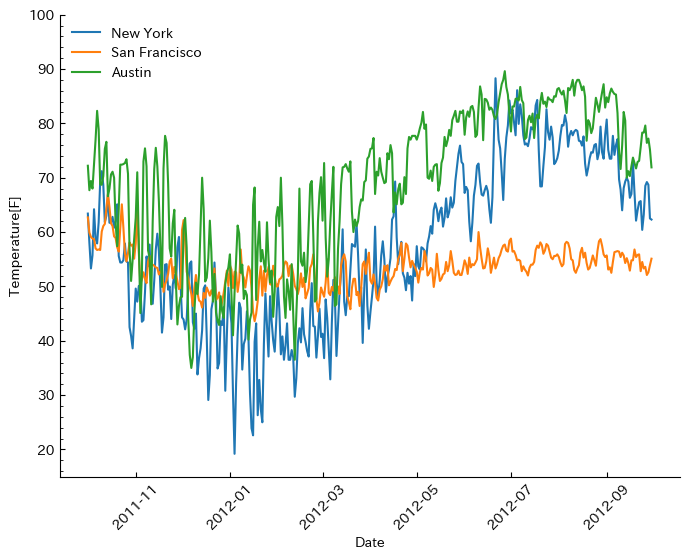

In [12]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()

for city_name in plot_df.columns[1:]:
    ax.plot(
        plot_df["date"],     # x軸のデータ（日付データ）
        plot_df[city_name],  # y軸のデータ（気温データ）
        label=city_name      # 凡例の名前
    )
ax.tick_params(axis="x", labelrotation=45)  # 軸の回転
ax.set_xlabel("Date")
ax.set_ylabel("Temperature[F]")
ax.set_ylim([15, 100])
ax.legend(frameon=False)
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(direction="in", which="both")
ax.spines[["top", "right"]].set_visible(False)
plt.show()

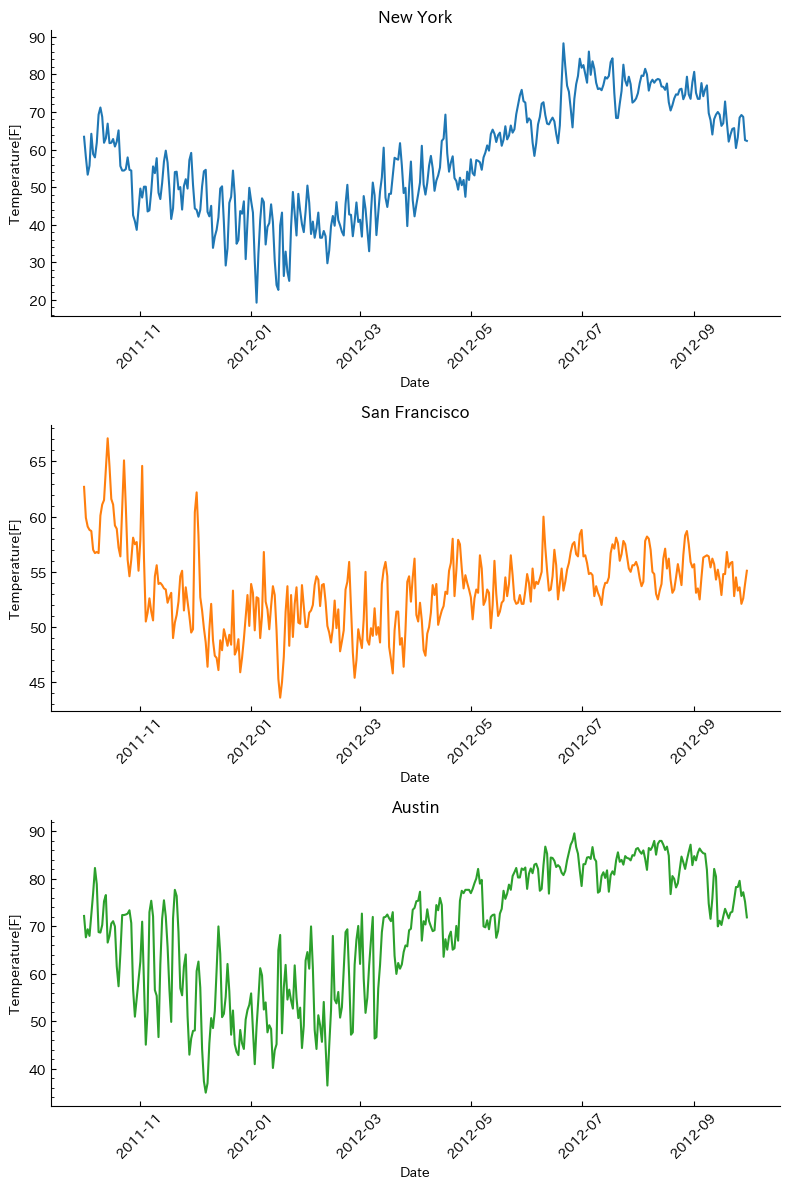

In [13]:
fig = plt.figure(figsize=(8, 12))

for i, city_name in enumerate(plot_df.columns[1:]):
    ax = fig.add_subplot(3, 1, i+1)
    ax.plot(
        plot_df["date"],     # x軸のデータ
        plot_df[city_name],  # y軸のデータ
        color=list(mcolors.TABLEAU_COLORS.values())[i]
    )
    ax.tick_params(axis="x", labelrotation=45)  # x軸の回転
    ax.set_xlabel("Date")
    ax.set_ylabel("Temperature[F]")
    ax.set_title(city_name)
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(direction="in", which="both")
    ax.spines[["top", "right"]].set_visible(False)
        
plt.tight_layout()
plt.show()

## 面グラフ(`Axes.stackpoint()`)

|   引数   |                                              説明                                               |
| -------- | ----------------------------------------------------------------------------------------------- |
| labels   | プロットのラベル。凡例に表示される。                                                            |
| colors   | 折れ線の色。`c`でも可                                                                           |
| baseline | ベースライン。`zero`: 単純な積み重ねプロット、`sym`: ゼロを中心に対称、`wiggle`傾きの二乗の合計 |
| hatch    | 面の網掛け                                                                                      |

In [14]:
stacked_area_df = pd.read_csv("../data/japan_energy.csv", index_col=0)
stacked_area_df.head()

,石油,石炭,天然ガス,原子力,水力,新エネルギー・地熱等
年度,,,,,,
1965,3.56,1.87,0.08,0.00,0.75,0.11
1966,4.13,1.92,0.09,0.01,0.77,0.11
1967,5.11,2.29,0.09,0.01,0.67,0.11
1968,5.95,2.42,0.10,0.01,0.72,0.12
1969,7.19,2.59,0.12,0.01,0.73,0.13


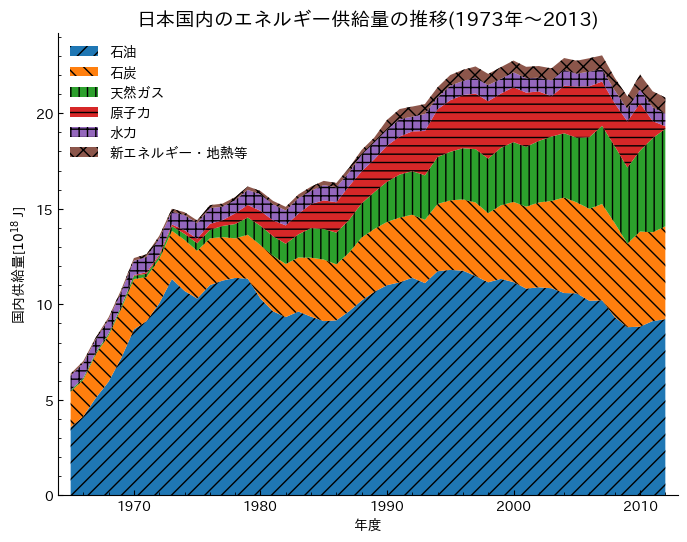

In [15]:
hatch_patterns = [ "//" , "\\\\" , "||" , "--" , "++" , "xx", "oo", "OO", "..", "**" ]

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()

stacks = ax.stackplot(
    stacked_area_df.index,
    stacked_area_df.values.T,
    labels=list(stacked_area_df.columns),
)

for stack, hatch in zip(stacks, hatch_patterns):
    stack.set_hatch(hatch)
    
ax.set_xlabel("年度")
ax.set_ylabel("国内供給量[$10^{18}$ J]")
ax.set_xlim([1964, 2013])
ax.legend(loc="upper left", frameon=False)
ax.set_title("日本国内のエネルギー供給量の推移(1973年～2013)", fontsize=14)
ax.minorticks_on()
ax.tick_params(direction="in", which="both")
ax.spines[["top", "right"]].set_visible(False)
plt.show()

## ツリーマップ

ここでは`squarify`ライブラリを用いた。

In [16]:
tree_map_df = pd.read_csv("../data/japan_population.csv")
tree_map_df.head()

,都道府県,総人口(千人)
0,北海道,5140
1,青森,1204
2,岩手,1181
3,宮城,2280
4,秋田,930


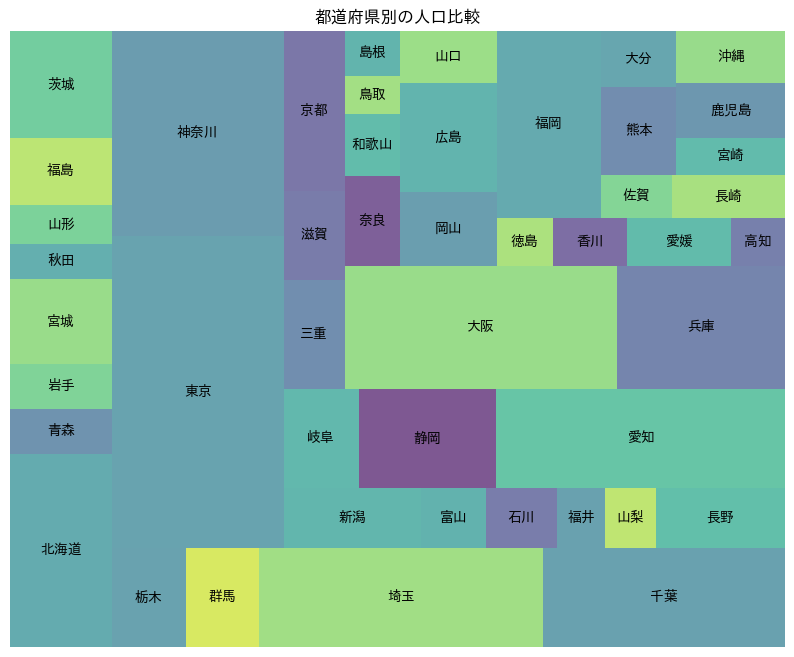

In [17]:
import squarify

plt.figure(figsize=(10, 8))
squarify.plot(
    sizes=tree_map_df.iloc[:, 1],
    label=tree_map_df.iloc[:, 0],
    alpha=0.7
)
plt.title("都道府県別の人口比較")
plt.axis("off")
plt.show()

## 100%積み重ね棒グラフ(`Axes.bar()`)

In [18]:
stacked_bar_100_df = pd.read_csv("../data/japan_energy.csv", index_col=0)
# %に変換
stacked_bar_100_df = stacked_bar_100_df.div(stacked_bar_100_df.sum(axis=1), axis=0) * 100
stacked_bar_100_df.head()

,石油,石炭,天然ガス,原子力,水力,新エネルギー・地熱等
年度,,,,,,
1965,55.886970,29.356358,1.255887,0.000000,11.773940,1.726845
1966,58.748222,27.311522,1.280228,0.142248,10.953058,1.564723
1967,61.714976,27.657005,1.086957,0.120773,8.091787,1.328502
1968,63.841202,25.965665,1.072961,0.107296,7.725322,1.287554
1969,66.759517,24.048282,1.114206,0.092851,6.778087,1.207057


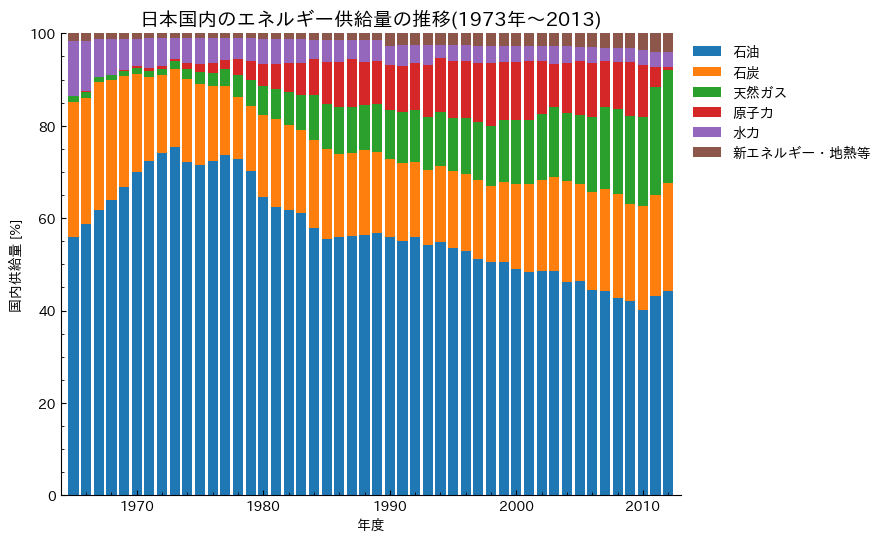

In [19]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()
bottom = np.zeros(stacked_bar_100_df.index.shape)

for enegy_type in stacked_bar_df.columns:
    ax.bar(
        x=stacked_bar_100_df.index,
        height=stacked_bar_100_df[enegy_type],
        bottom=bottom,
        label=enegy_type
        )
    bottom += stacked_bar_100_df[enegy_type]

ax.set_xlabel("年度")
ax.set_ylabel("国内供給量 [%]")
ax.set_title("日本国内のエネルギー供給量の推移(1973年～2013)", fontsize=14)
ax.set_xlim([1964, 2013])
ax.set_ylim([0, 100])
ax.legend(loc="upper left", bbox_to_anchor=(1, 1), frameon=False)  # 凡例を外側に
ax.minorticks_on()
ax.tick_params(direction="in", which="both")
ax.spines[["top", "right"]].set_visible(False)
plt.show()

## 円グラフ（`Axes.pie()`）

|     引数     |                                      説明                                       |
| ------------ | ------------------------------------------------------------------------------- |
| explode      | 数値のリストを与えると半径の割合で数値分離れる。                                |
| labels       | 円グラフのラベル。リストで渡す。                                                |
| colors       | 円グラフが循環する色。リストで渡す。                                            |
| startaungle  | 円グラフの開始点が x 軸から反時計回りに回転する角度。`90`とすると上から始まる。 |
| center       | グラフの中心の座標。デフォルト(0, 0)                                            |
| rotatelabels | `True`の場合、各ラベルを対応するスライスの角度に回転する。                      |
| normalize    | `True`の場合、データを正規化して完全な円グラフを作成する                        |


In [20]:
pie_df = pd.read_csv("../data/japan_energy.csv", index_col=0)

pie_df = pie_df.loc[[1965, 2012], :]

pie_df

,石油,石炭,天然ガス,原子力,水力,新エネルギー・地熱等
年度,,,,,,
1965,3.56,1.87,0.08,0.00,0.75,0.11
2012,9.22,4.86,5.10,0.14,0.66,0.84


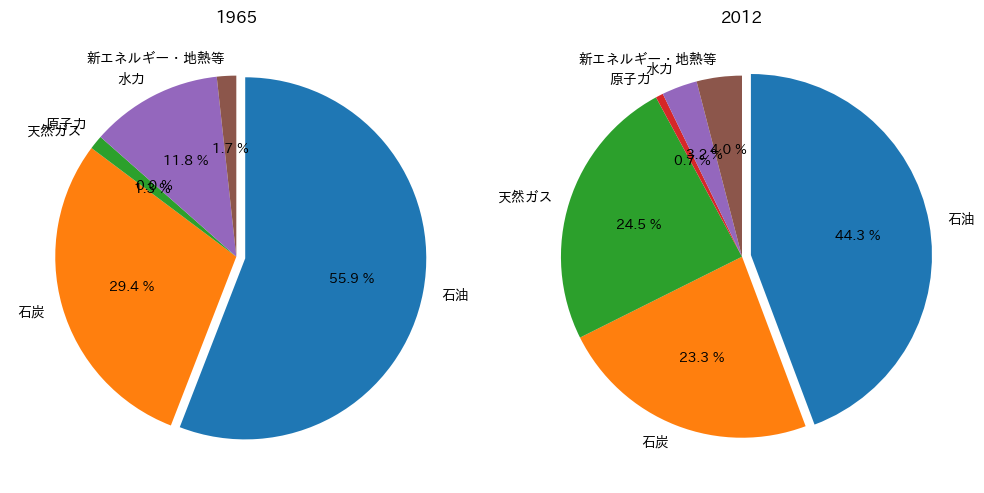

In [21]:
fig = plt.figure(figsize=(10, 5))

for i, year in enumerate(pie_df.index):
    ax = fig.add_subplot(1, 2, i + 1)
    ax.pie(
        pie_df.loc[year, :],
        labels=pie_df.columns,
        counterclock=False,
        startangle=90,
        # rotatelabels=True,
        autopct="%1.1f %%",
        explode=[0.05] + [0 for _ in range(len(pie_df.columns) - 1)],
        normalize=True
    )
    ax.set_title(year)
plt.tight_layout()
plt.show()

## ヒストグラム（`Axes.hist()`）

### 主な引数とその説明

|    引数     |                                  説明                                  |
| ----------- | ---------------------------------------------------------------------- |
| bins        | bin（柱）の本数。デフォルトは10。                                      |
| range       | 対象範囲を(float, float)で指定。デフォルトは(x.min(), x.max())。       |
| density     | True：n（下記参照）の合計が1になるように正規化する。                   |
| cumulative  | True：グラフを累積分布にする。                                         |
| histtype    | グラフの種類（下記参照）。デフォルトは`bar`。                          |
| align       | 柱の横位置。デフォルトは`mid`（区間の中央）。`left`、`right`が選べる。 |
| orientation | デフォルトは`vertical`。`horizontal`にすると横向きになる。             |
| color       | ビンの色。リストで系列毎に指定可。                                     |
| label       | 系列名。リストで系列毎に指定可。                                       |
| facecolor   | ビンの色。`fc`でも可。colorとは違いリスト不可（全系列同色）。          |
| hatch       | binの網掛け。                                                          |
| linewidth   | binの縁の太さ。`lw`でも可。                                            |
| edgecolor   | ビンの縁の色。ecでも可。                                               |
| alpha       | 透明度を0～1で指定。                                                   |
| zorder      | オブジェクトが重なっていた場合この値が大きい方が前面に描画される。     |


In [22]:
hist_df = pd.read_csv("../data/diamond.csv")
hist_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


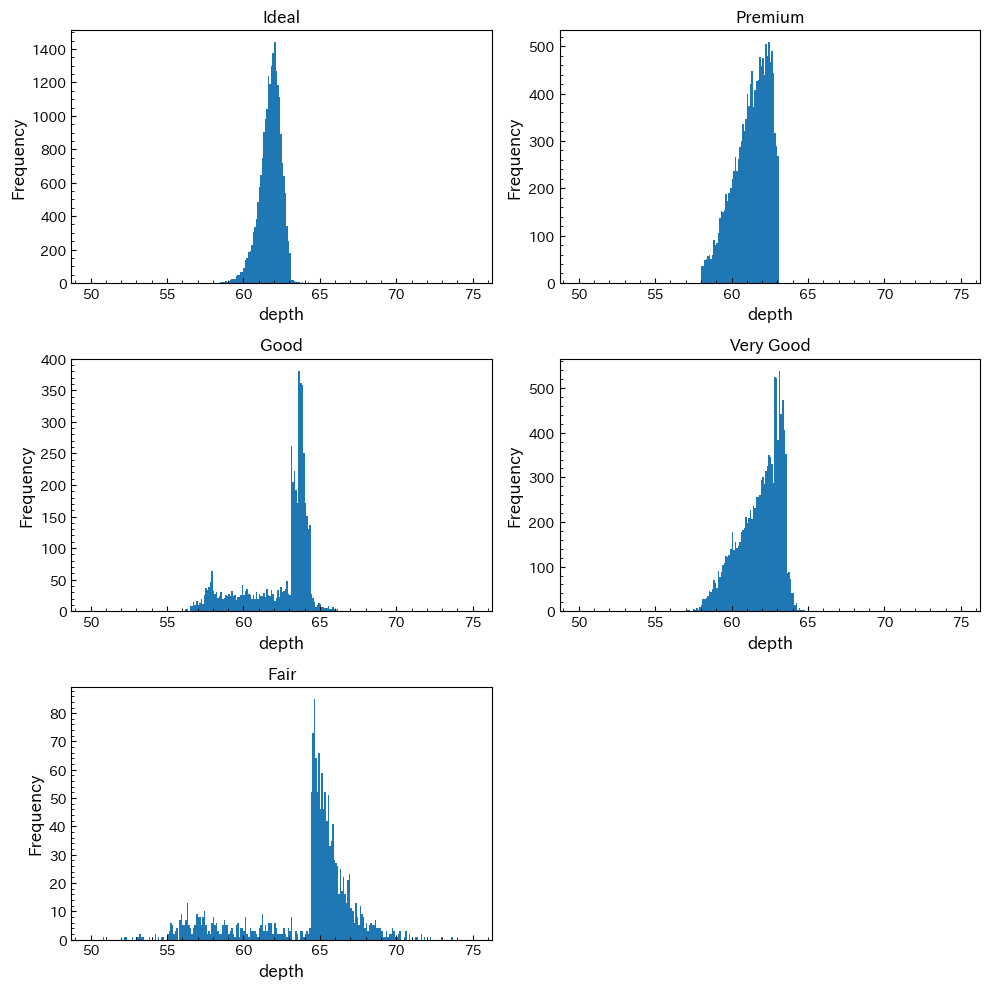

In [23]:
fig = plt.figure(figsize=(10, 10))

for i, cut in enumerate(hist_df["cut"].unique()):
    ax = fig.add_subplot(3, 2, i+1)
    ax.hist(
        x=hist_df[hist_df["cut"]==cut]["depth"],
        bins=250,
        range=(50, 75)
    )
    ax.set_xlabel("depth", fontsize=12)
    ax.set_ylabel("Frequency", fontsize=12)
    ax.set_title(cut)
    ax.minorticks_on()
    ax.tick_params(direction="in", which="both")
    
plt.tight_layout()
plt.show()

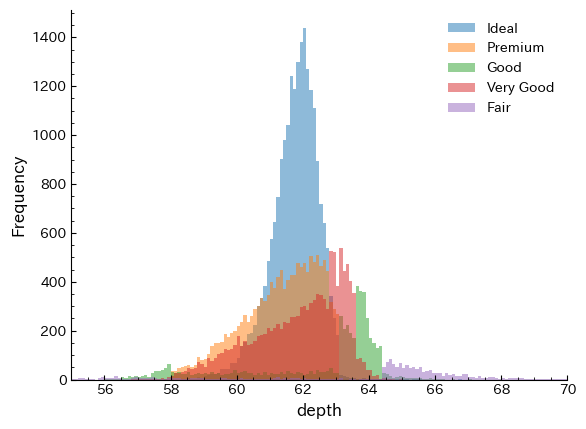

In [24]:
fig = plt.figure()
ax = fig.add_subplot()

for cut in hist_df["cut"].unique():
    ax.hist(
        x=hist_df[hist_df["cut"]==cut]["depth"],
        range=(50, 75),
        bins=250,
        alpha=0.5,
        label=cut,
        histtype="stepfilled"
    )

ax.set_xlim([55, 70])
ax.set_xlabel("depth", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)
ax.legend(frameon=False)
ax.minorticks_on()
ax.tick_params(direction="in", which="both")
ax.spines[["top", "right"]].set_visible(False)
plt.show()

## 箱ひげ図（`Axes.boxplot()`）

### 主な引数とその説明

|     引数     |                               説明                                |
| ------------ | ----------------------------------------------------------------- |
| notch        | True：箱を切れ目ありにする。95%信頼区間が可視化される。           |
| sym          | 外れ値のマーカーの色と形状を文字列型で指定。''で非表示。          |
| vert         | False：グラフを横持ちにする。                                     |
| whis         | 外れ値の境界をIQR=1とした値で指定。デフォルトは1.5。              |
| widths       | 箱の幅（太さ）。横軸の値で指定。デフォルトは0.5。                 |
| labels       | 系列名（x軸目盛りラベルに表示される）をリストで指定。             |
| showmeans    | True：平均値を表すマーカーを表示。                                |
| patch_artist | True：箱をLine2DオブジェクトではなくPatchオブジェクトで描画する。 |
| zorder       | オブジェクトが重なっていた時この値が大きい方が前面に描画される。  |
| capprops     | 最大値・最小値を表す線のスタイルを辞書型で指定。                  |
| boxprops     | 箱のスタイルを辞書型で指定。                                      |
| whiskerprops | ひげ線のスタイルを辞書型で指定。                                  |
| medianprops  | 中央値を表す線のスタイルを辞書型で指定。                          |
| flierprops   | 外れ値のマーカーのスタイルを辞書型で指定。                        |
| meanprops    | 平均値のマーカーのスタイルを辞書型で指定。                        |

In [25]:
box_plot_df = pd.read_csv("../data/iris.csv")
box_plot_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


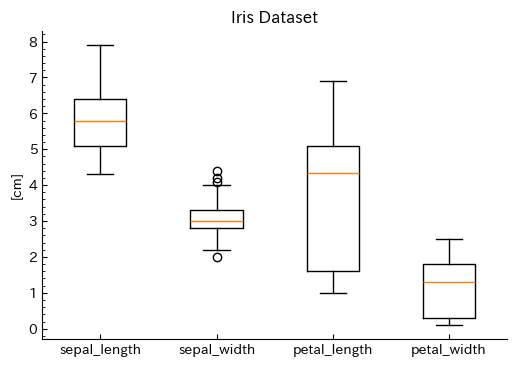

In [26]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot()
ax.boxplot(
    x=[box_plot_df[col] for col in box_plot_df.columns[:-1]],
    labels=[col for col in box_plot_df.columns[:-1]]
)
ax.set_ylabel("[cm]")
ax.set_title("Iris Dataset", fontsize=12)
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(direction="in", which="both")
ax.spines[["top", "right"]].set_visible(False)
plt.show()

## バイオリンプロット（`Axes.violinplot()`）

### 主な引数とその説明

|    引数     |                              説明                              |
| ----------- | -------------------------------------------------------------- |
| vert        | False：バイオリンを横向きにする。                              |
| widths      | バイオリンの最大幅（太さ）。横軸の値で指定。デフォルトは0.5。  |
| showmeans   | True：平均値を表す横線を表示。                                 |
| showextrema | False：縦線と、最大値と最小値を表す短い横線を非表示。          |
| showmedians | True：中央値を表す横線を表示。                                 |
| quantiles   | 短い横線を表示するパーセンタイル値（0～1）をデータごとに指定。 |

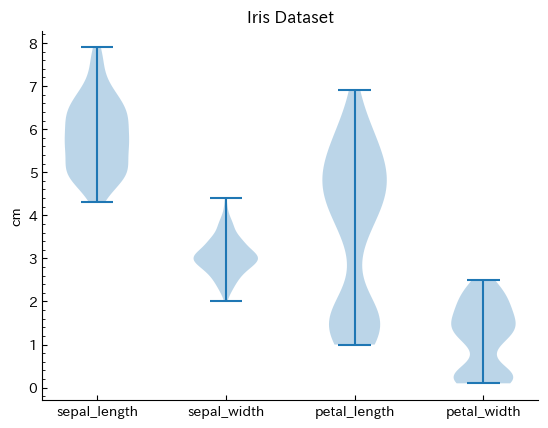

In [27]:
fig = plt.figure()
ax = fig.add_subplot()
ax.violinplot(
    dataset=[box_plot_df[col] for col in box_plot_df.columns[:-1]],
)
ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels([col for col in box_plot_df.columns[:-1]])
# ax.set_xticklabels(["a", "b", "c", "d"])
ax.set_ylabel("cm")
ax.set_title("Iris Dataset")
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(direction="in", which="both")
ax.spines[["top", "right"]].set_visible(False)
plt.show()

## ヒートマップ

In [28]:
heatmap_df = pd.read_csv("../data/cars_dataset.csv")
heatmap_df = heatmap_df.iloc[:, [1, 2, 4, 6, 7, 8]].corr()  # カテゴリ型を削除
heatmap_df

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.519459,-0.747270,0.244933,-0.144384,-0.028511
price,0.519459,1.000000,-0.426925,0.353244,-0.334174,0.629251
mileage,-0.747270,-0.426925,1.000000,-0.234098,0.179153,0.122965
tax,0.244933,0.353244,-0.234098,1.000000,-0.423287,0.294148
mpg,-0.144384,-0.334174,0.179153,-0.423287,1.000000,-0.282202
engineSize,-0.028511,0.629251,0.122965,0.294148,-0.282202,1.000000


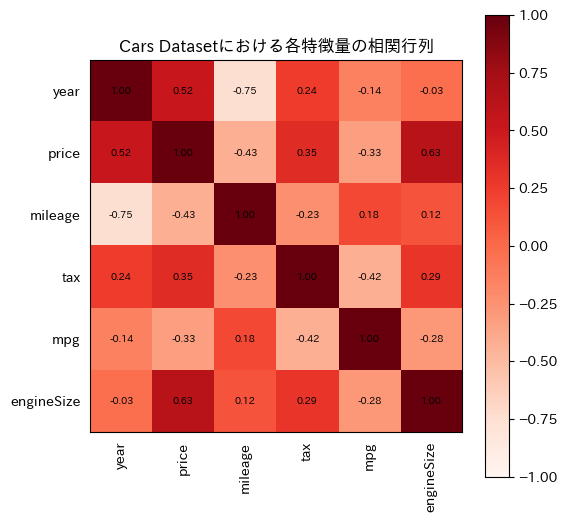

In [29]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot()
ax.set_xticks([i for i in range(len(heatmap_df.columns))])
ax.set_yticks([i for i in range(len(heatmap_df.columns))])
ax.set_xticklabels(heatmap_df.columns)
ax.set_yticklabels(heatmap_df.index)
for i, col in enumerate(heatmap_df.columns):
    for j, idx in enumerate(heatmap_df.index):
        text = ax.text(
            x=i, y=j,
            s=f"{heatmap_df.iloc[i, j]:.2f}",
            size=7,
            ha="center",
            va="center",
            color="black"
        )
ax.tick_params(axis="x", labelrotation=90)  # 軸の回転
im = ax.imshow(X=heatmap_df, cmap="Reds", vmin=-1, vmax=1)
colorbar = fig.colorbar(im, ax=ax)
ax.set_title("Cars Datasetにおける各特徴量の相関行列")
ax.tick_params(left=False, bottom=False)
plt.show()
plt.show()